In [6]:
import pylab as plt
%matplotlib inline


def inspect_motif(motif_file,plott):
    f=open(motif_file,'r').read().split('\n')
    c=0
    if plott:
        plt.figure()
        print len(f)
    all_ind=[]
    
    for line in f:
        c+=1

        if line!='':
            #print c
            line=line.strip()
            ts=line.split(' ')[1:]
            ind=line.split(' ')[0]
            all_ind.append(ind)
            ts=[float(i) for i in ts]
            #print len(ts)
            if plott:
                plt.plot(ts)
                plt.title(motif_file)
    return all_ind


def plot_originals(all_ind):
    plt.figure()
    #f=open('new_mk_data/downsample_syl_2_meta_100_MKrm_sub.txt','r').read().split('\n')
    #let's add the meta data into this by reading 
    f=open('new_csv_data/downsample_syl_2_meta_100rm_sub.csv','r').read().split('\n')
    all_texts=''
    for ind in all_ind:
        line=f[int(ind)]
        l=line.split(',')
        data=l[:-4]
        tones,file_name,position=l[-4],l[-2],l[-1]
        text=','.join([tones,file_name,position])
        text+='\n'
        plt.plot(data)
        all_texts+=text
    plt.text(.1,-.4,all_texts)
            
def plot_all_motifs(X,num_motif):
    for i in range(1,num_motif):
        si=str(i)
        m='new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_%s.0_%s.txt'%(X,si)
        print m
        all_ind=inspect_motif(m,True)
        plot_originals(all_ind)

new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_1.txt
6
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_2.txt
3
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_3.txt
9
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_4.txt
5
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_5.txt
5
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_6.txt
4
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_7.txt
4
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_8.txt
8
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_9.txt
8
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_10.txt
4
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_11.txt
12
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_12.txt
4
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_13.txt
9
new_mk_data/downsample_syl_2_meta_100_MKrm_sub_txt_0_100_2.0_14.txt
6
new_mk_data/downsample_syl_2

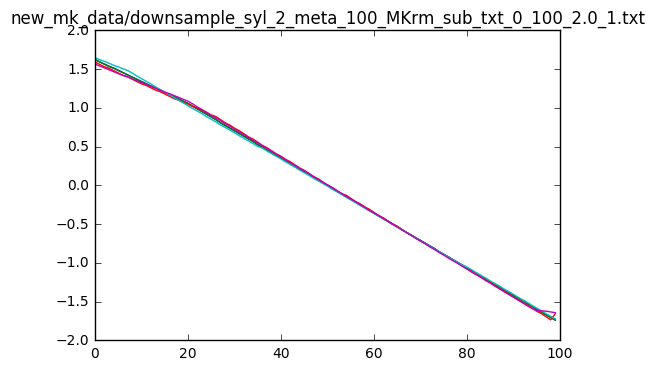

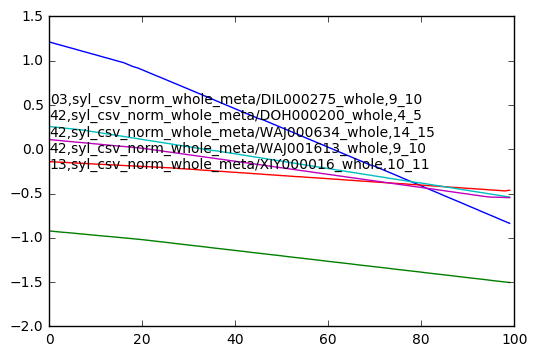

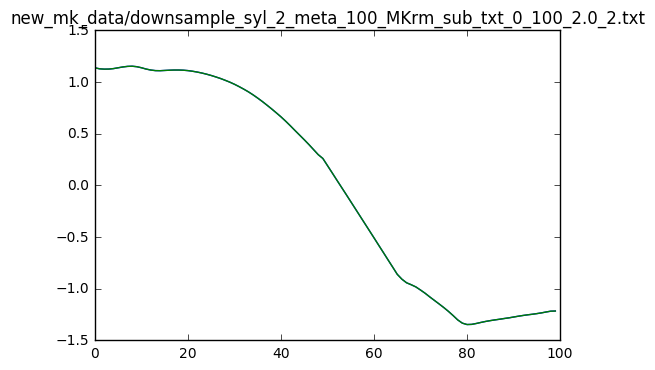

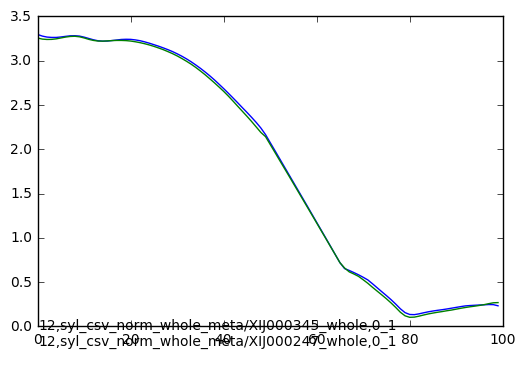

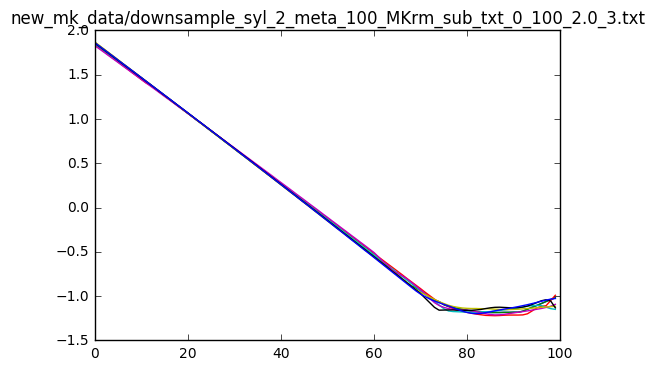

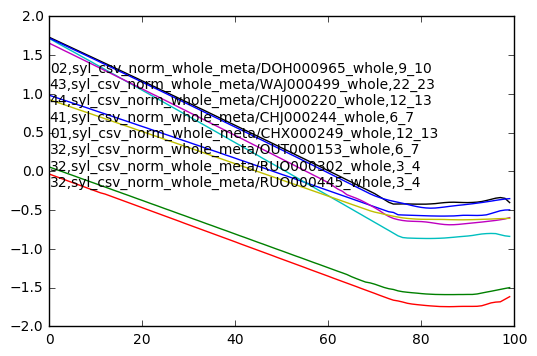

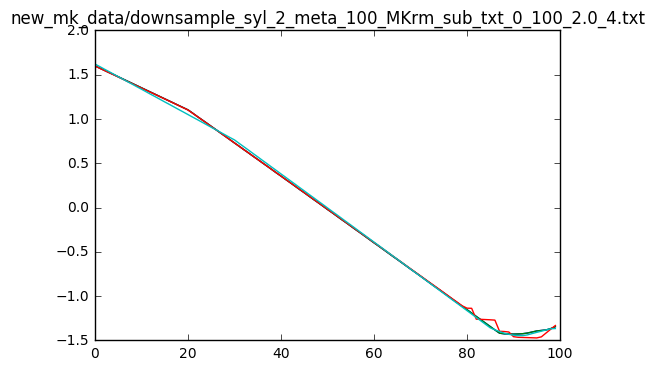

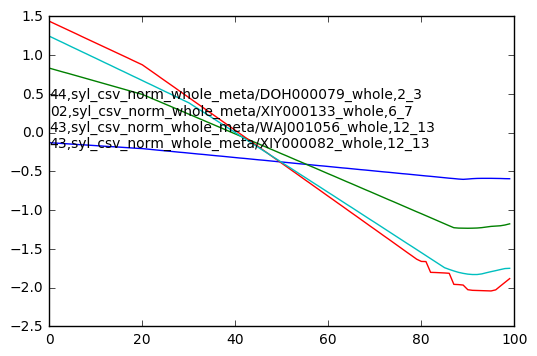

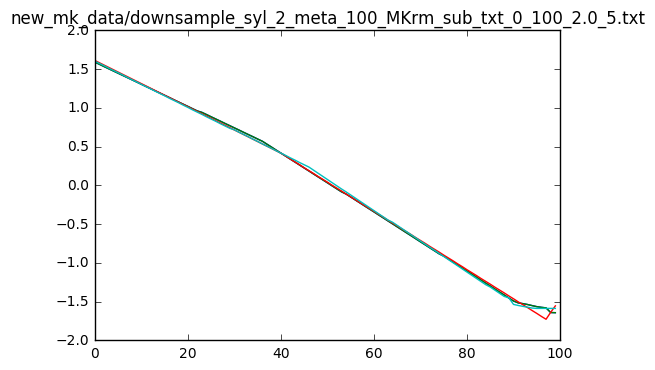

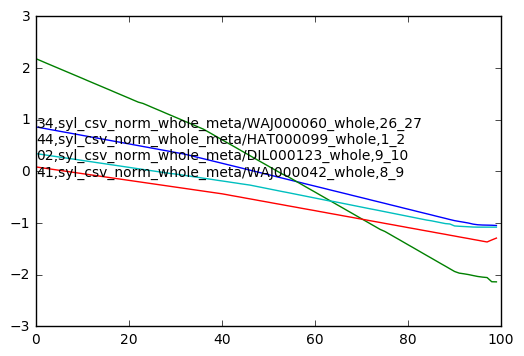

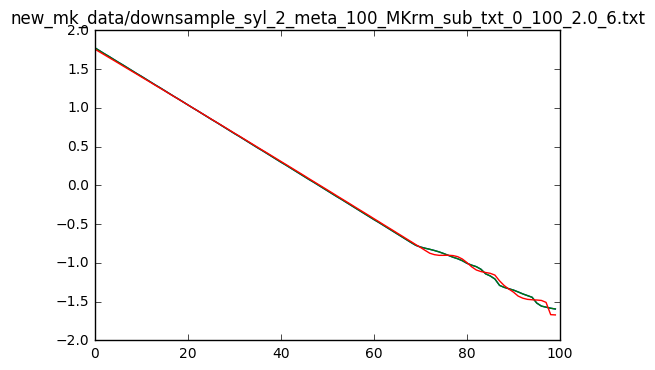

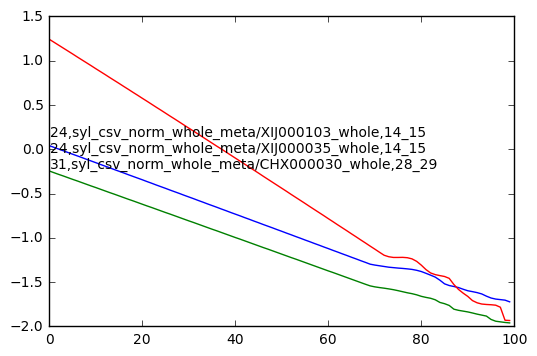

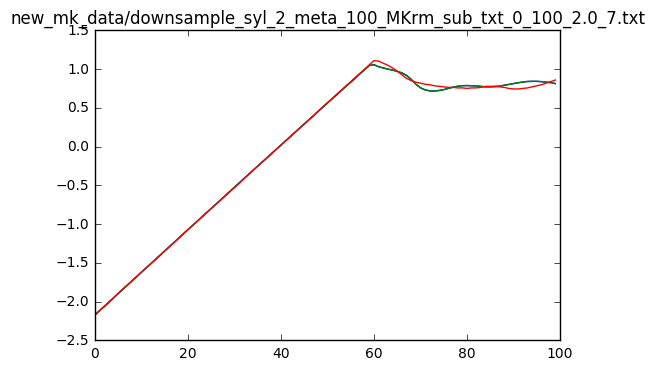

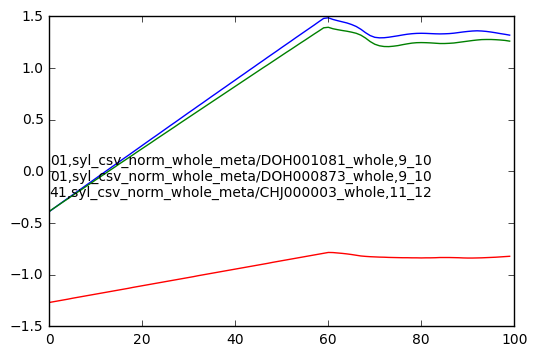

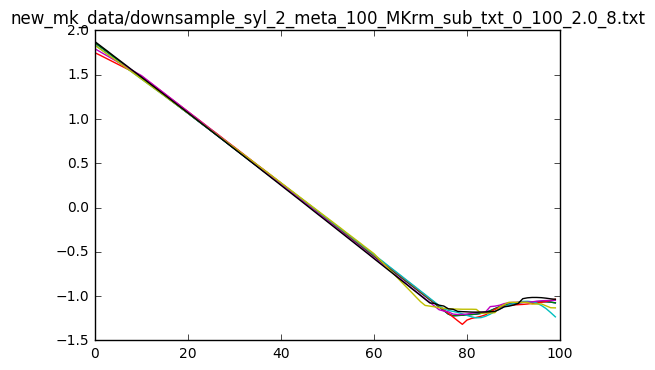

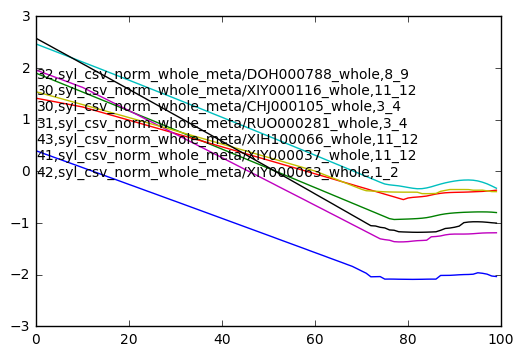

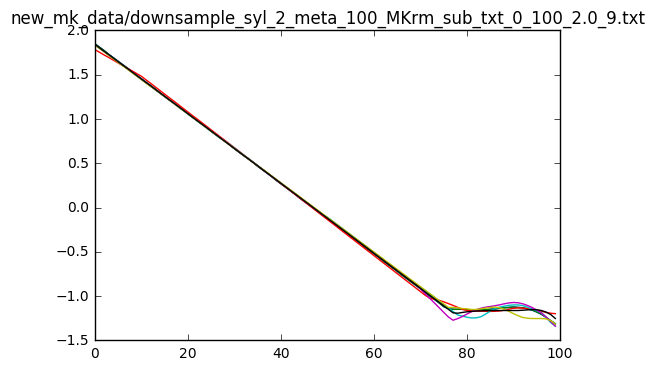

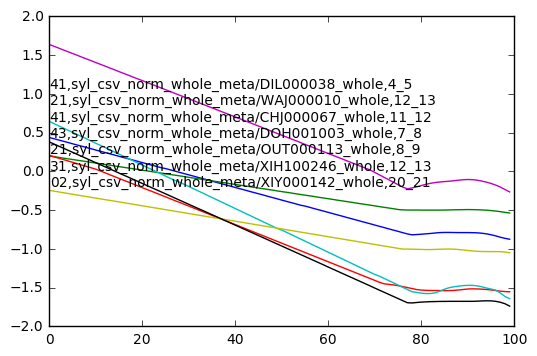

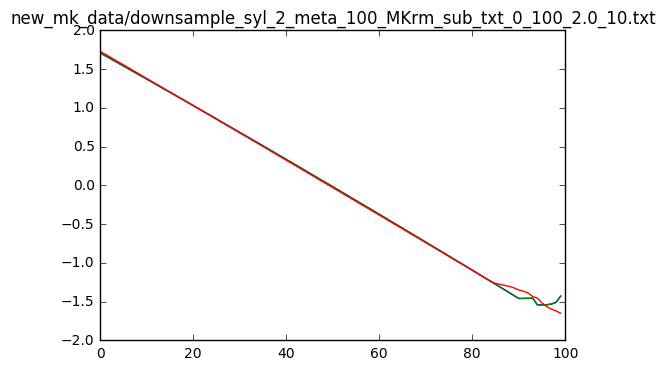

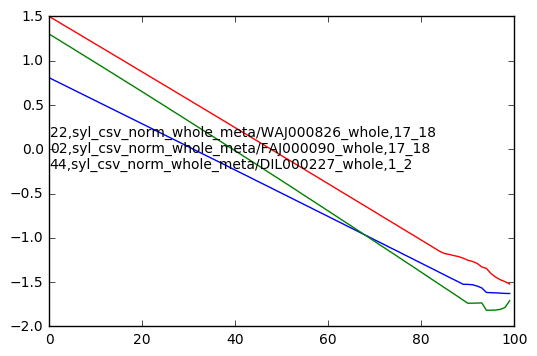

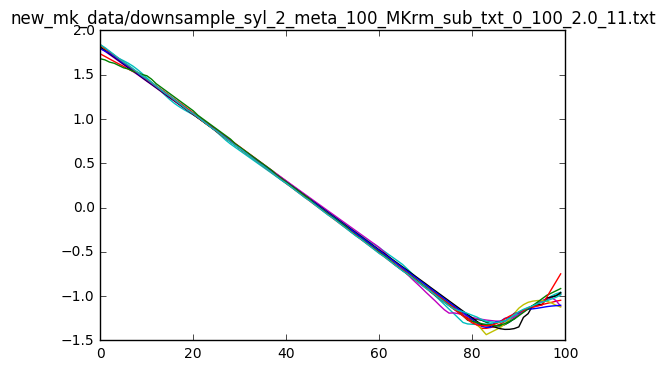

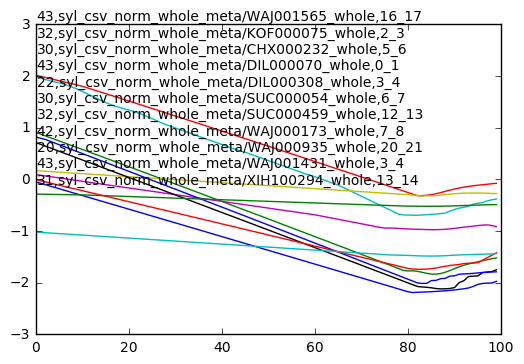

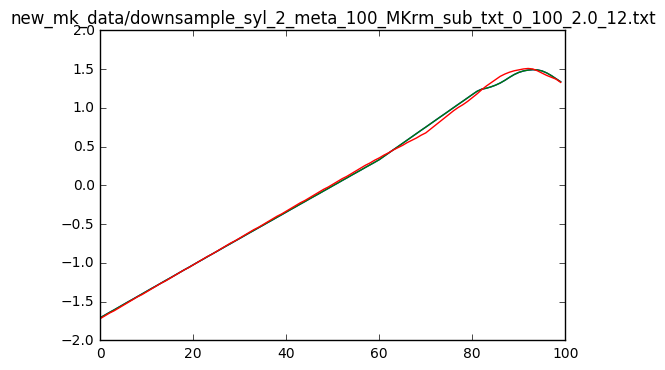

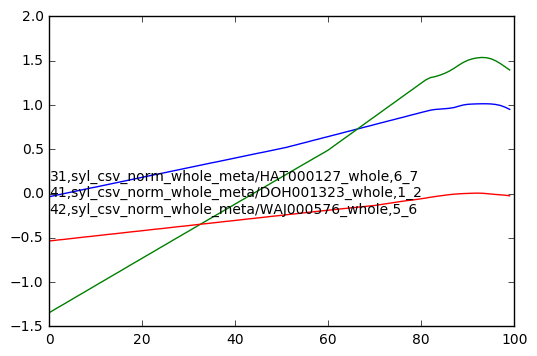

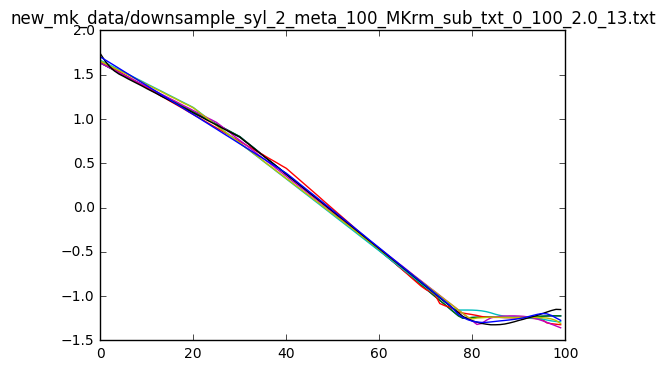

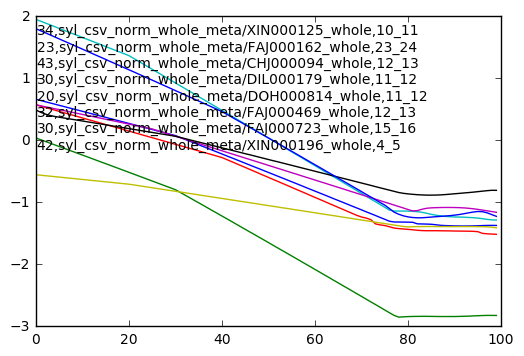

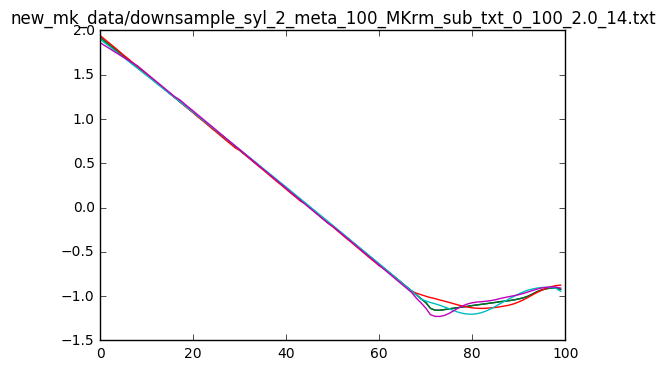

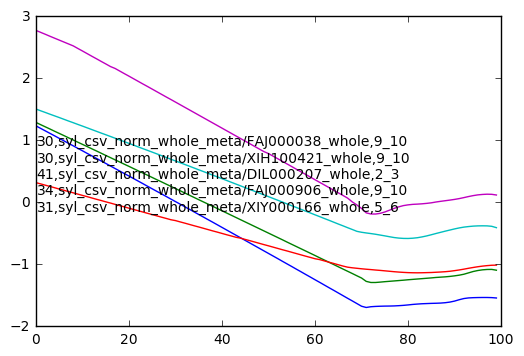

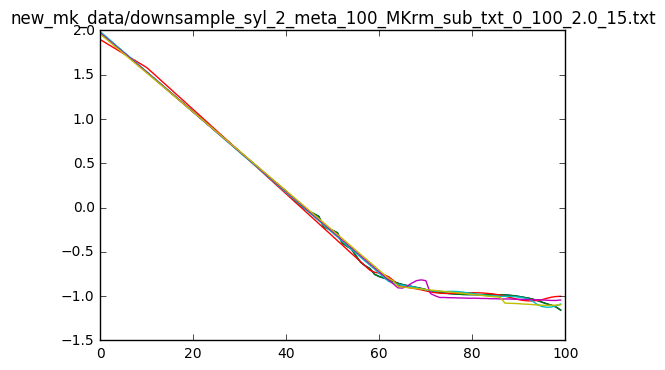

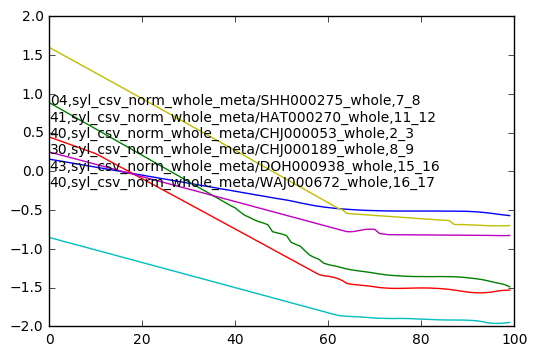

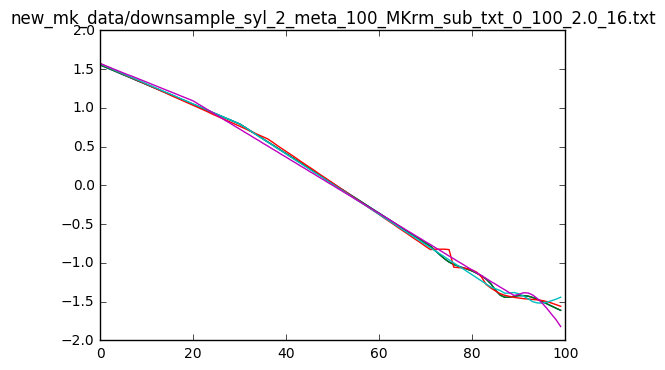

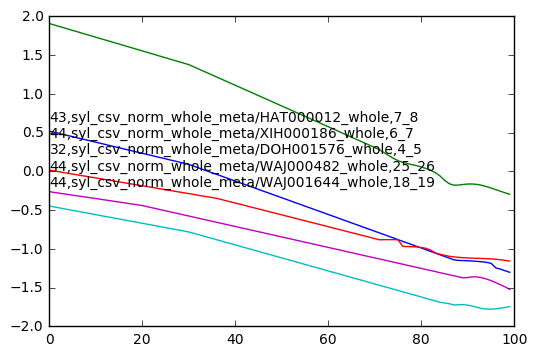

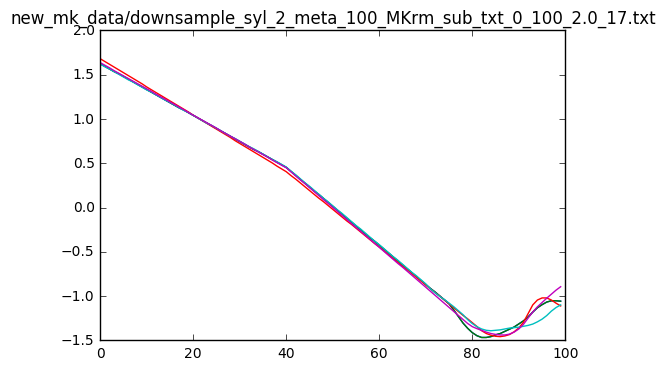

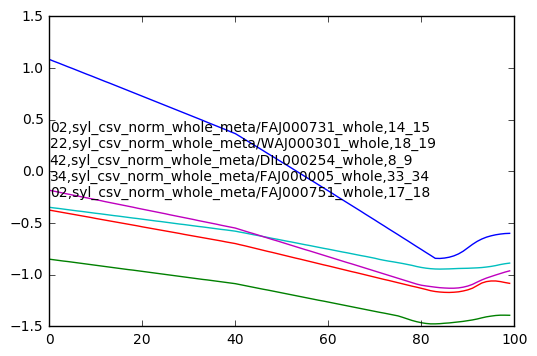

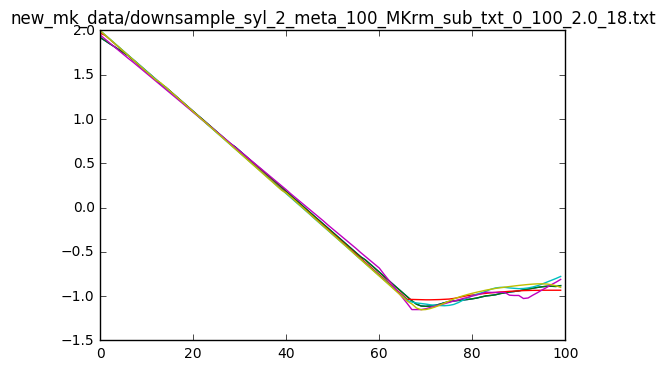

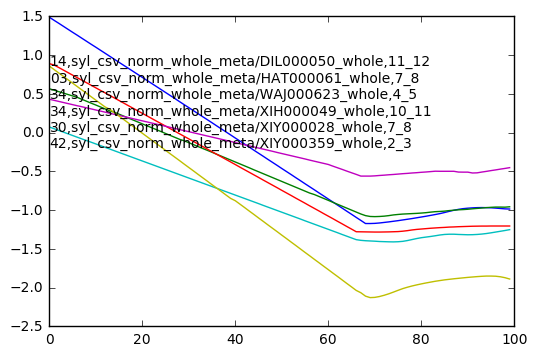

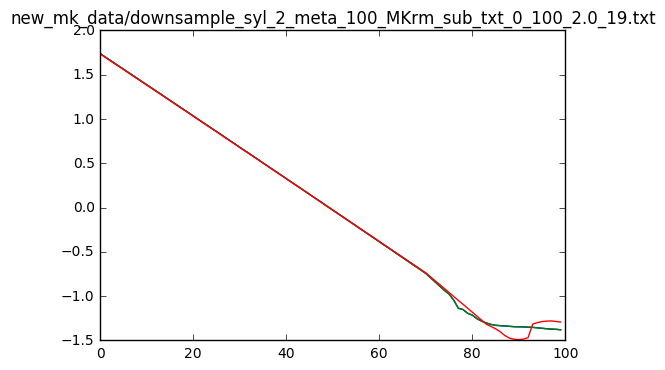

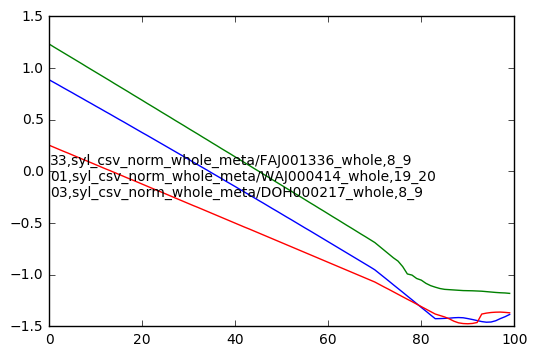

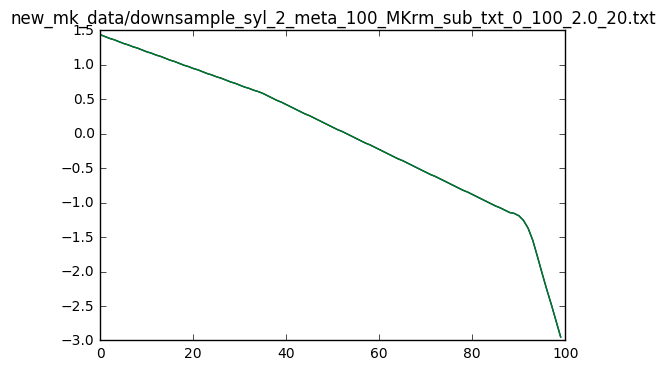

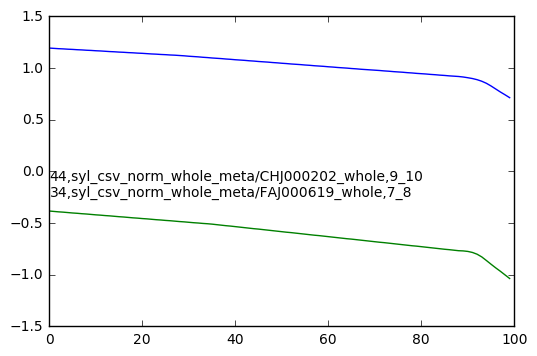

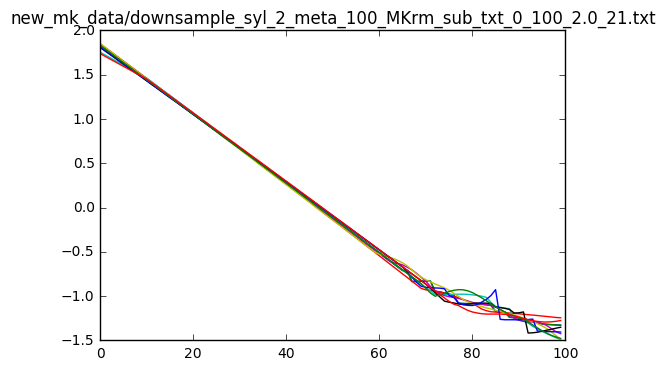

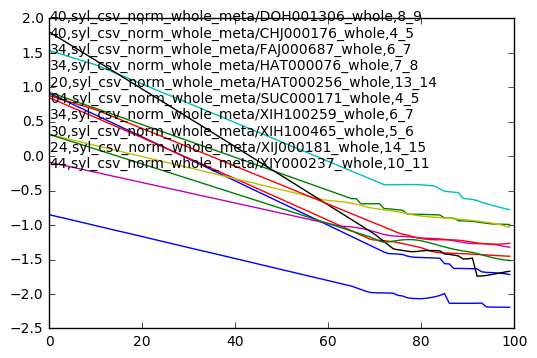

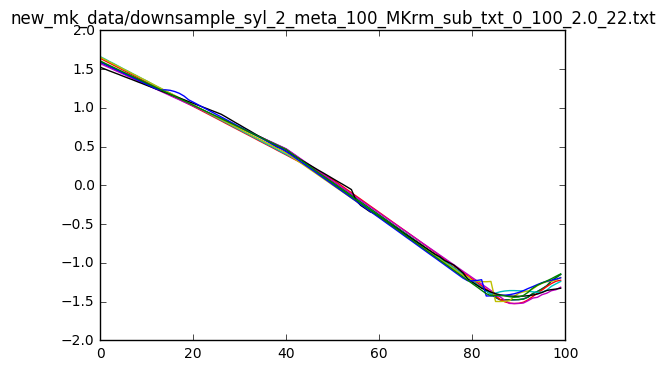

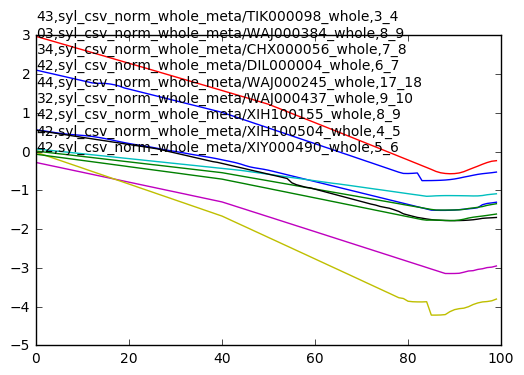

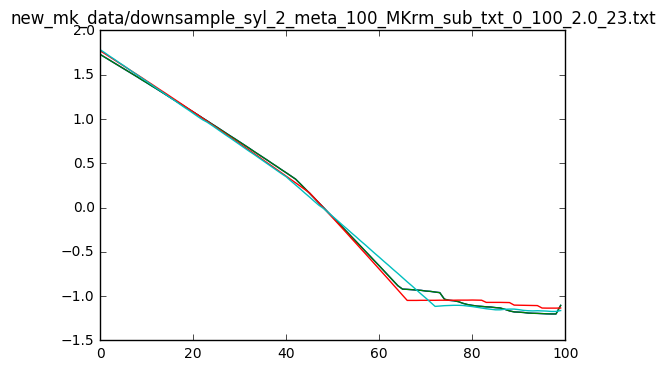

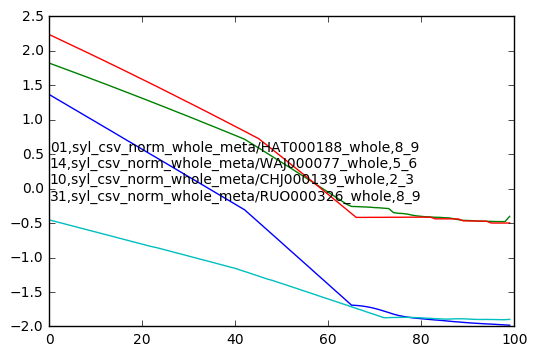

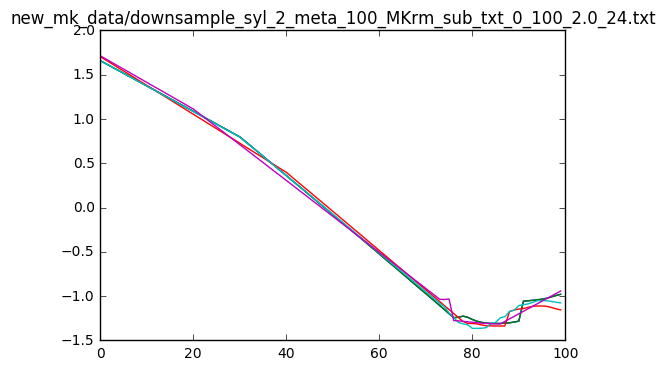

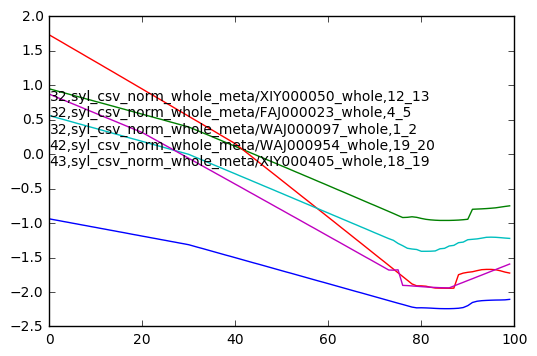

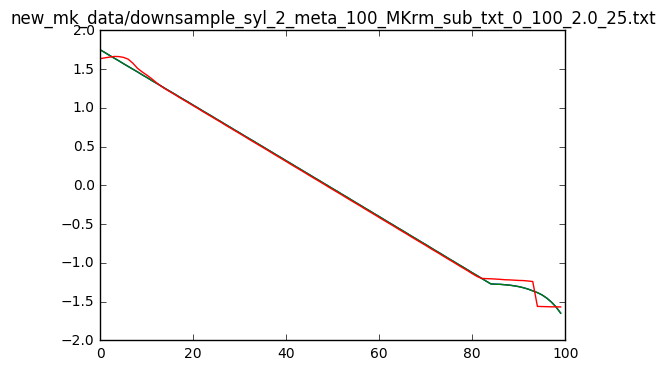

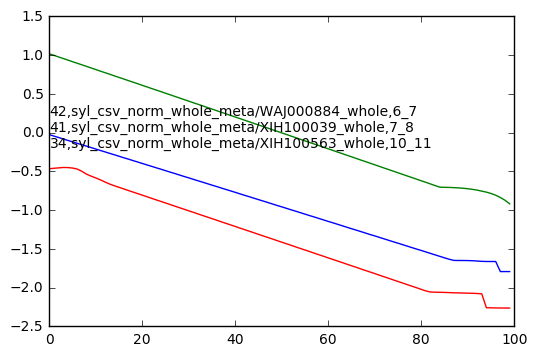

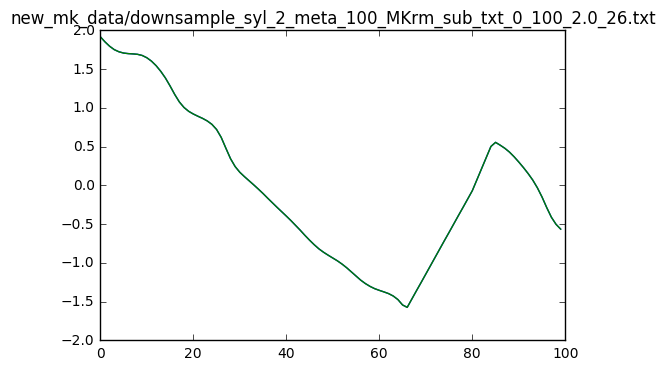

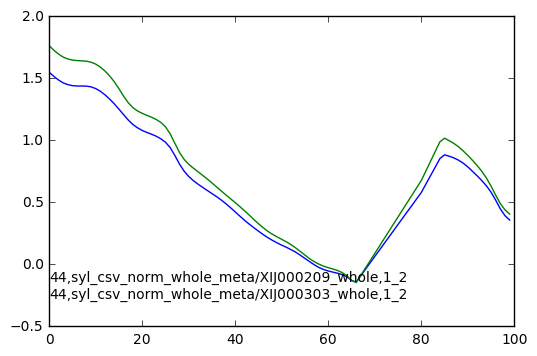

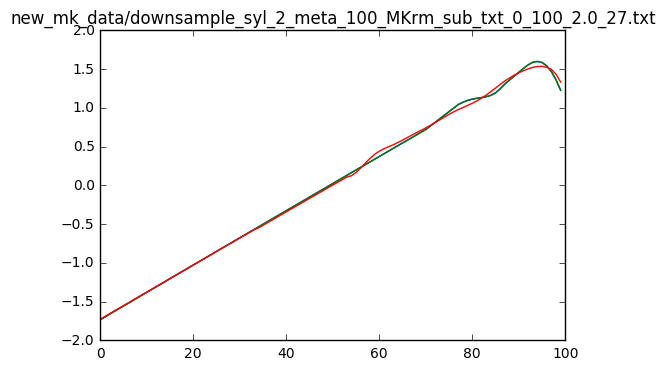

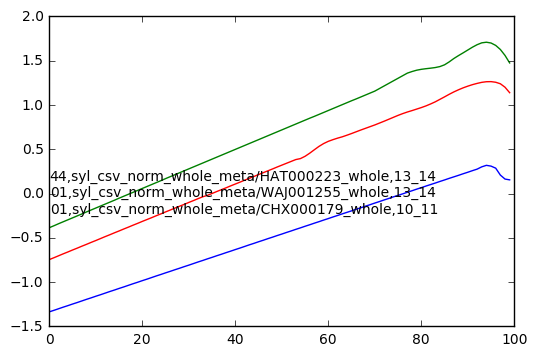

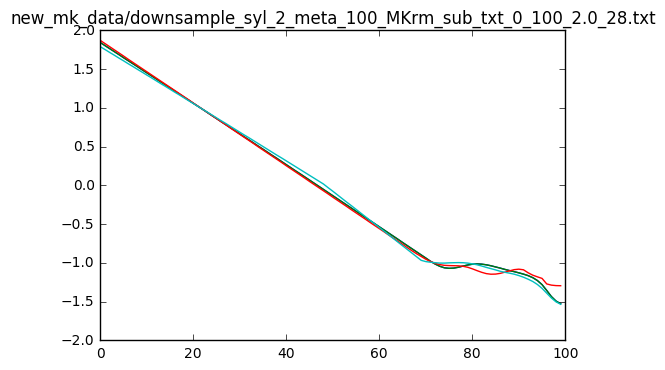

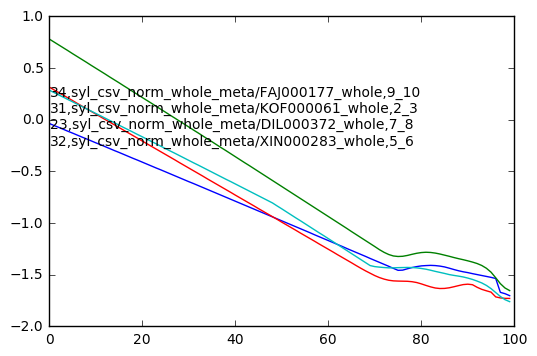

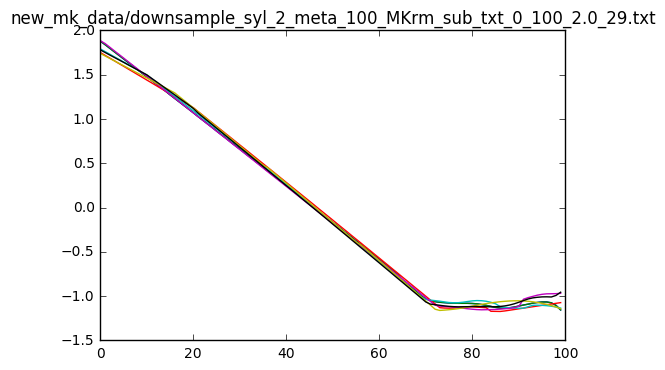

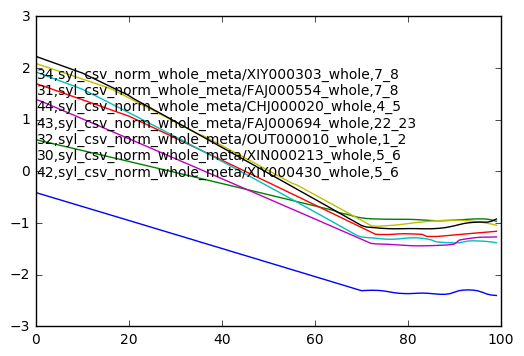

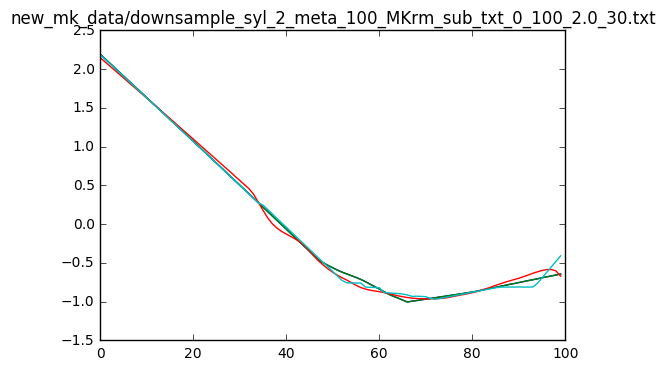

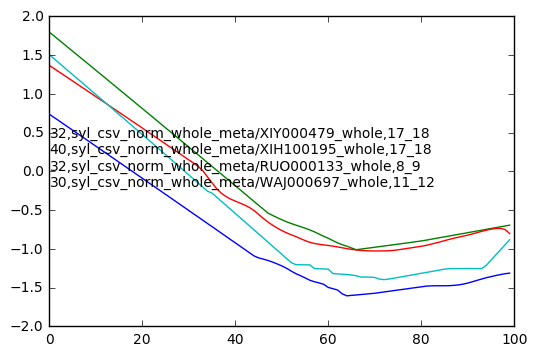

In [8]:
plot_all_motifs(2,31)

## how we should proceed

1. build a dictionary from the motif id to attributes of its cluster members;
2. let's say we decide to inspect a particular motif  cluster, 4_1 (X=4, motif 1), then we can retrieve all its members' attributes, then we use the attributes to generate one plot per member. Since they are all similar, we can randomly select 5, let's say, and only visualize those as a starting point. 

## what to think about now

1. it's nice to use ipynb as a research and writing tool. We can later organize the writiing into the thesis, and see which plots to use. 
2. think about what we would do if we visualized and inspected these motifs. 
3. think about the new direction in discovering interesting and meaningful motifs, the tradeoff between X and K, and other new things we plan to write about as our central theme in a computational centric thesis.

# after i inspected these motifs with metadata above

1. many of these have some consistencies of tone category distributions. This makes me wonder, what would happen with the simple motifs we pruned? We might need to walk through that again in order to better understand the properties of those motifs. But also if we want to compute a complexity score, that'll help too.

2. I have an observation that the complexity of time-series is a very important property in motif discovery. For instance, if you observe above, the simple motifs (after normlization) will have a more diverse composition in their members (they actually are not that similar sometimes). This is because of the z-score normalization that also changed the shape of motifs in relation to one another.

# visualize the motif subsequences in spectrogram of a sentence file

In [ ]:
import re,sys
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect_left
from batch_interp import *
from scipy.interpolate import interp1d
from scipy.io.wavfile import read

#sample usage:
#python plot_spectro.py pitch/pitcCHJ000001.tab all_data/CHJ000001.phons all_data/CHJ000001.wav

def find_lt(a, x):
    'Find rightmost value less than x'
    i = bisect_left(a, x)
    if i:
        return a[i-1]
    raise ValueError


def get_annos(phons_file):
    #input could be phons or qphons file
    g=open(phons_file,'r').read().split('\n')
    timestamps=[]
    for line in g:
        l=line.split()
        if line!='' and not line.startswith('begin'):
            timestamps.append(l)
    xt=[]
    labels=[]
    for l in timestamps:
        xt.append(l[1])
        labels.append(l[2])
    return timestamps,xt,labels


def gen_annos(time,xt,labels):
    """xt is a set of end time stamps where labels are located """
    my_xticks = [""]*len(time)
    prev=0
    for k in range(len(xt)):
        t=float(xt[k])
        if t>=time[0]:
            #print "t=",t
            lt=bisect_left(time,t)-5
            #print "lt=",lt
            #print 'prev=',prev
            lta=(lt+prev)/2
            prev=lt

            #print 'lta=',lta

            my_xticks[lta]=labels[k]
            #print "label=",labels[k]
    return my_xticks




def plot_spectro(time,pitch,my_xticks,timestamps,audio_file,plotname):
    #input: a time and a pitch object (list), and the set of xticks
    input_data = read(audio_file)
    fs=16000

    S, freqs, bins, im = plt.specgram(input_data[1], NFFT=1024, Fs=fs, noverlap=512)
    #maxp=np.max(pitch)
    #minp=np.min(pitch)
    plt.xticks(time, my_xticks)
    plt.scatter(time,pitch)
    for l in timestamps:
        #print l
        plt.plot((l[0],l[0]),(50,300),'k-')
    plt.ylim([50,300])
    #plt.savefig(plotname+'-spectro.pdf')


def gen_qphons(timestamps,trim_pitch,time):
    #trim_pitch and time should have the same length, which they should, because after you trimmed it, the deleted values are interpolated using time as the x-axis
    qphons=[]
    for tsp in timestamps:
        start,end,label=tsp[0],tsp[1],tsp[2]

        m = re.search(r'\d$', label)
        #print label,m
        # if the string ends in digits m will be a Match object, or None otherwise.
        if m is not None:
            #print start,end
            #print tsp
            syl_values=[trim_pitch[i] for i in range(len(trim_pitch)) \
                        if time[i]>=float(start) and time[i] <=float(end)]
            #voiced[label]=syl_values
            interp_time=np.arange(float(start),float(end),0.001)
            pitch_ratio=round(float(len(syl_values))/len(interp_time),3)
            #print len(syl_values),len(interp_time)
            qphons.append([str(start),str(end),label,str(pitch_ratio)])
        else:
            tsp.append('na')
            #print tsp
            qphons.append(tsp)
    return qphons



def write_qphons_file(filename,qph):
    g=open(filename,'w')
    g.write('begin,end,label,p_ratio\n')
    g.close()
    g=open(filename,'a')
    for line in qph:
        l='\t'.join(line)
        g.write(l+'\n')
    g.close()


#added trim-plot and interp-plot functions in plot_spectro.py. The former will show uninterpolated trimmed pitch track while the latter shows the entire time (as indicated by .phons file) with interpolated pitch. for visibility, extrapolation is set at 1000, but maybe reset to 0 when showing this to others.
def do_plot(audio_file,pitch_tab_file,phons_file):
    timestamps,xt,labels=get_annos(phons_file)
    #get some time and pitch files
    b=timestamps[0][0]
    e=timestamps[-1][1]
    #first trim(and interpolate to adjusted time)
    time,adjusted_time,pitch,trim_pitch=trim(pitch_tab_file)
    #then trim unvoiced pitch
    second_adjusted_time,trim_unv_pitch=trim_unvoiced(timestamps,adjusted_time,trim_pitch)
    #interpolate to .phons file time with extrapolation on beginning and end at a high(for visibility in plot) constant value
    interp_time,interp_pitch=interpolate_pitch(b,e,second_adjusted_time,trim_unv_pitch)
    #get the labels and label positions for the plot
    my_xticks_interp=gen_annos(interp_time,xt,labels)
    my_xticks = gen_annos(time,xt,labels)
    #plot_spectro(second_adjusted_time,trim_unv_pitch,my_xticks,timestamps,audio_file,"trim")
    plot_spectro(interp_time,interp_pitch,my_xticks_interp,timestamps,audio_file,"interp")


def pitch_proc_chain(pitch_tab_file,phons_file):
    #in pitch preprocess, you need phons file because you want to filter out the unvoiced pitch estimation at first, then interpolate back those.
    timestamps,xt,labels=get_annos(phons_file)
    #get some time and pitch files
    b=timestamps[0][0]
    e=timestamps[-1][1]
    #first trim(and interpolate to adjusted time)
    time,adjusted_time,pitch,trim_pitch=trim(pitch_tab_file)
    #then trim unvoiced pitch
    second_adjusted_time,trim_unv_pitch=trim_unvoiced(timestamps,adjusted_time,trim_pitch)
    #interpolate to .phons file time with extrapolation on beginning and end at a high(for visibility in plot) constant value
    interp_time,interp_pitch=interpolate_pitch(b,e,second_adjusted_time,trim_unv_pitch)
    return interp_time,interp_pitch




def trim_unvoiced(timestamps,adjusted_time,trim_pitch):
    #adjusted_time and trim_pitch must have same length
    "further trim all unvoiced segments in case it picked up pitch values on those"
    trim_unv_pitch=[]
    trim_unv_time=[]
    ok_label=['m','n','l']

    for k in range(len(timestamps)):
        tsp=timestamps[k]
        prev_con_label=timestamps[k-1][2]
        if prev_con_label in ok_label:
            start=timestamps[k-1][0]
            end,label=tsp[1],tsp[2]

        else:
            start,end,label=tsp[0],tsp[1],tsp[2]
        m = re.search(r'\d$', label)
        #print label,m
        # if the string ends in digits m will be a Match object, or None otherwise.
        if m is not None:
            #print start,end
            #print tsp

            syl_values=[trim_pitch[i] for i in range(len(trim_pitch)) \
                        if adjusted_time[i]>=float(start) and adjusted_time[i] <=float(end)]
            syl_times=[adjusted_time[i] for i in range(len(adjusted_time)) \
                        if adjusted_time[i]>=float(start) and adjusted_time[i] <=float(end)]
            trim_unv_pitch.extend(syl_values[:])
            trim_unv_time.extend(syl_times[:])
    second_adjusted_time=[time for time in adjusted_time if time>=trim_unv_time[0] and time<=trim_unv_time[-1]]

    fp=interp1d(trim_unv_time,trim_unv_pitch)

    return second_adjusted_time,fp(second_adjusted_time)








In [ ]:
#use this mode to plot spectrogram overlaid with pitch contour and segmentation for individual file
#python plot_spectro.py pitch/pitcCHX000040.tab test/CHX000040.phons test/CHX000040.wav 
#warning: to plot spectorgram it must take .wav file, not flac
audio_file=
pitch_tab_file=
phons_file=
do_plot(audio_file,pitch_tab_file,phons_file)